In [3]:
pip install wheel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

Trace_0 = pd.read_csv('attacktraces/attacktrace_0.csv')
Trace_1 = pd.read_csv('attacktraces/attacktrace_1.csv')
Trace_2 = pd.read_csv('attacktraces/attacktrace_2.csv')
Trace_3 = pd.read_csv('attacktraces/attacktrace_3.csv')
Trace_4 = pd.read_csv('attacktraces/attacktrace_4.csv')
Trace_5 = pd.read_csv('attacktraces/attacktrace_5.csv')
Trace_6 = pd.read_csv('attacktraces/attacktrace_6.csv')
Trace_7 = pd.read_csv('attacktraces/attacktrace_7.csv')
Trace_8 = pd.read_csv('attacktraces/attacktrace_8.csv')
Trace_9 = pd.read_csv('attacktraces/attacktrace_9.csv')

In [119]:
import matplotlib.pyplot as plt
import os
import numpy as np 

samples = 1000
N = 29
trace_0 = np.zeros((N, samples))
trace_9 = np.zeros((N, samples))

for i in range(29):
    trace_0[i] = Trace_0.iloc[:, i]

In [120]:
trace_9[0]

array([0., 0., 0., ..., 0., 0., 0.])

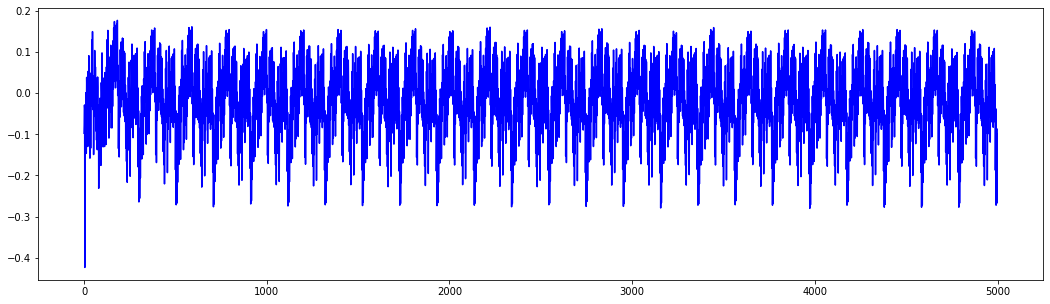

In [121]:
# Plot the traces

plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(trace_0[10], color = 'blue')  
plt.show()


## Reference traces

In [128]:
import pandas as pd

###########################################################
#Excel Sheets Data (look into reftrace_i.csv for details)
###########################################################
#
#     -----------------------------------------------
#    | o1        | o2      | ......         |o29      |
#     -----------------------------------------------
#    |sample 0   |
#    |.          |
#    |..         |
#    |...        |
#    |sample 5000|
#    |----------
#    |samples 0  |
#    |.          |
#    |..         |
#    |...        |
#    |sample 5000|
#    |---------- |
#    | etc       |
############################################################

Ref_Trace_0 = pd.read_csv('reftraces/reftrace_0.csv') 

Ref_Trace_1 = pd.read_csv('reftraces/reftrace_1.csv') 

Ref_Trace_2 = pd.read_csv('reftraces/reftrace_2.csv') 

Ref_Trace_3 = pd.read_csv('reftraces/reftrace_3.csv') 

Ref_Trace_4 = pd.read_csv('reftraces/reftrace_4.csv') 

Ref_Trace_5 = pd.read_csv('reftraces/reftrace_5.csv') 

Ref_Trace_6 = pd.read_csv('reftraces/reftrace_6.csv') 

#Ref_Trace_15 = pd.read_csv('reftraces/reftrace_15.csv') 

#Ref_Trace_30 = pd.read_csv('reftraces/reftrace_30.csv')  

In [129]:
import numpy as np 


samples = 1000
N =29

Training_traces = np.zeros((21*N, samples))
Training_labels = np.zeros((21*N))


ref_trace_0 = np.zeros((3*N, samples))
ref_trace_1 = np.zeros((3*N, samples))
ref_trace_2 = np.zeros((3*N, samples))
ref_trace_3 = np.zeros((3*N, samples))
ref_trace_4 = np.zeros((3*N, samples))
ref_trace_5 = np.zeros((3*N, samples))
ref_trace_6 = np.zeros((3*N, samples)) 
#Build the ref traces
for i in range(29):
    ref_trace_0[i] = Ref_Trace_0.iloc[:1000, i].to_numpy() 
    ref_trace_0[i+29] = Ref_Trace_0.iloc[1000:2000, i].to_numpy() 
    ref_trace_0[i+58] = Ref_Trace_0.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_1[i] = Ref_Trace_1.iloc[:1000, i].to_numpy()
    ref_trace_1[i+29] = Ref_Trace_1.iloc[1000:2000, i].to_numpy() 
    ref_trace_1[i+58] = Ref_Trace_1.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_2[i] = Ref_Trace_2.iloc[:1000, i].to_numpy()
    ref_trace_2[i+29] = Ref_Trace_2.iloc[1000:2000, i].to_numpy() 
    ref_trace_2[i+58] = Ref_Trace_2.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_3[i] = Ref_Trace_3.iloc[:1000, i].to_numpy()
    ref_trace_3[i+29] = Ref_Trace_3.iloc[1000:2000, i].to_numpy() 
    ref_trace_3[i+58] = Ref_Trace_3.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_4[i] = Ref_Trace_4.iloc[:1000, i].to_numpy()
    ref_trace_4[i+29] = Ref_Trace_4.iloc[1000:2000, i].to_numpy() 
    ref_trace_4[i+58] = Ref_Trace_4.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_5[i] = Ref_Trace_5.iloc[:1000, i].to_numpy()
    ref_trace_5[i+29] = Ref_Trace_5.iloc[1000:2000, i].to_numpy() 
    ref_trace_5[i+58] = Ref_Trace_5.iloc[2000:3000, i].to_numpy() 
    
    ref_trace_6[i] = Ref_Trace_6.iloc[:1000, i].to_numpy()
    ref_trace_6[i+29] = Ref_Trace_6.iloc[1000:2000, i].to_numpy() 
    ref_trace_6[i+58] = Ref_Trace_6.iloc[2000:3000, i].to_numpy() 

In [130]:
    
#Prepare the training data 
for i in range(78):
    Training_traces[i] = ref_trace_0[i]
    Training_labels[i] = 0
    
for i in range(78):
    Training_traces[i+29*3] = ref_trace_1[i]
    Training_labels[i+29*3] = 1
    
for i in range(78):
    Training_traces[i+29*6] = ref_trace_2[i]
    Training_labels[i+29*6] = 2
    
for i in range(78):
    Training_traces[i+29*9] = ref_trace_3[i]
    Training_labels[i+29*6] = 3

    
for i in range(78):
    Training_traces[i+29*12] = ref_trace_4[i]
    Training_labels[i+29*12] = 4
    
for i in range(78):
    Training_traces[i+29*15] = ref_trace_5[i]
    Training_labels[i+29*15] = 5
    
for i in range(78):
    Training_traces[i+29*18] = ref_trace_6[i]
    Training_labels[i+29*18] = 6

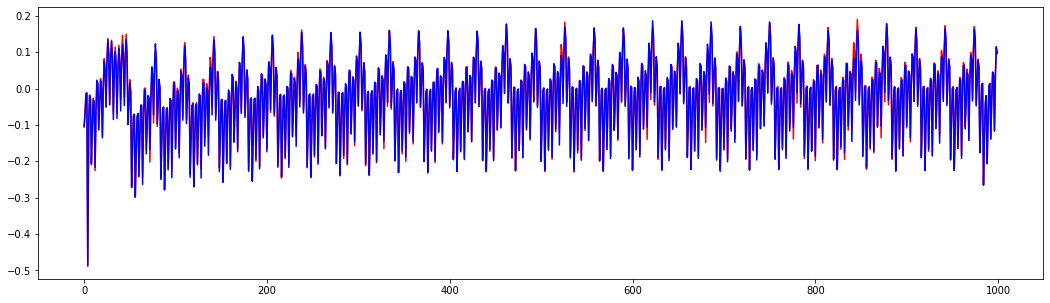

In [131]:
# Plot the traces
import matplotlib.pyplot as plt

plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5)  
plt.plot(ref_trace_0[1][0:1000], color = 'red')  
plt.plot(ref_trace_0[2][0:1000], color = 'blue') 
plt.show()


## ML side-channel analysis

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Training_traces, Training_labels, test_size=0.2)

from sklearn.neural_network import MLPClassifier 

Dec_clf = MLPClassifier(
    random_state=42,
    solver='adam', 
    learning_rate='adaptive',
    max_iter=2000,
    hidden_layer_sizes=[400],
    batch_size=20,
    early_stopping=True,
    n_iter_no_change=1000,
    verbose=False, 
)
Dec_clf.fit(X_train, y_train)
 


In [ ]:
predictions =np.zeros(len(y_test))
predictions = Dec_clf.predict(X_test)
success = 0

for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    #else:
        #print(predictions[i], y_test['i])
 
         
print((success /len(y_test))*100)

In [147]:
y_test

array([0., 0., 6., 4., 5., 5., 6., 3., 0., 6., 0., 0., 5., 5., 0., 0., 0.,
       0., 0., 6., 5., 0., 1., 0., 0., 0., 0., 5., 0., 5., 1., 0., 0., 0.,
       3., 5., 1., 3., 0., 6., 4., 5., 6., 0., 0., 6., 3., 0., 5., 6., 6.,
       6., 0., 0., 1., 5., 0., 1., 6., 4., 0., 5., 0., 0., 6., 1., 0., 3.,
       6., 6., 0., 6., 0., 0., 0., 1., 0., 0., 3., 0., 6., 5., 5., 6., 0.,
       4., 0., 0., 1., 6., 0., 4., 6., 5., 1., 3., 0., 6., 3., 0., 1., 5.,
       1., 0., 6., 0., 0., 5., 0., 3., 0., 4., 4., 0., 5., 0., 6., 1., 4.,
       4., 3., 0.])

In [148]:
predictions

array([0., 0., 4., 4., 0., 0., 4., 0., 0., 0., 0., 0., 6., 6., 0., 0., 0.,
       0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0.,
       0., 4., 0., 0., 0., 6., 4., 0., 0., 0., 0., 0., 6., 6., 4., 0., 4.,
       0., 0., 0., 4., 0., 0., 0., 0., 0., 4., 0., 0., 0., 4., 0., 0., 0.,
       0., 4., 0., 0., 4., 0., 0., 4., 0., 0., 0., 6., 0., 0., 0., 4., 0.,
       0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 4., 0.,
       0., 0., 0., 0., 0., 0., 0., 4., 4., 0., 0., 0., 0., 0., 0., 0., 6.,
       0., 0., 0.])